## P1 

In [1]:
import numpy as np 
    
def diffuse_spread_recover(x, y, status, d, beta, gamma, L, alpha):
    """
    Function performing the diffusion step, the infection step, and the 
    recovery step happening in one turn for a population of agents.
    
    Parameters
    ==========
    x, y : Agents' positions.
    status : Agents' status.
    d : Diffusion probability.
    beta : Infection probability.
    gamma : Recovery probability.
    L : Side of the square lattice.
    """
    
    N = np.size(x)
    
    # Diffusion step.
    diffuse = np.random.rand(N)
    move = np.random.randint(4, size=N)
    for i in range(N):
        if diffuse[i] < d:
            if move[i] == 0:
                x[i] = x[i] - 1
            elif move[i] == 1:
                y[i] = y[i] - 1
            elif move[i] == 2:
                x[i] = x[i] + 1
            else: 
                # move[i] == 3
                y[i] = y[i] + 1
                
    # Enforce pbc.
    x = x % L
    y = y % L

    # Spreading disease step.
    infected = np.where(status == 1)[0]
    
    for i in infected:
        # Check whether other particles share the same position.
        same_x = np.where(x == x[i])
        same_y = np.where(y == y[i])
        same_cell = np.intersect1d(same_x, same_y)
        for j in same_cell:
            if status[j] == 0:
                if np.random.rand() < beta:
                    status[j] = 1

            ## If previously recovered, they should be able to get sick again
            ## less risk to be sick if agent has already been sick.
            if status[j] == 2:
                if np.random.rand() < alpha:
                    status[j] = 1
        
    # Recover step.
    for i in infected:
        # Check whether the infected recovers.
        if np.random.rand() < gamma:
            status[i] = 2
    
    return x, y, status


Step: 0
Step: 10000
Step: 20000
Step: 30000
Step: 40000
Done.


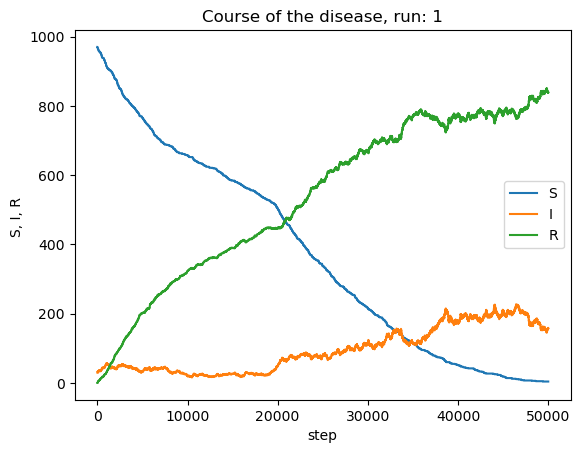

Step: 0
Step: 10000
Step: 20000
Step: 30000
Step: 40000
Done.


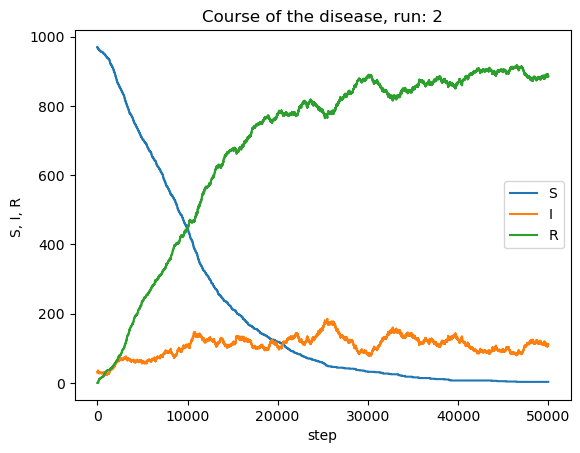

Step: 0
Step: 10000
Step: 20000
Step: 30000
Step: 40000
Done.


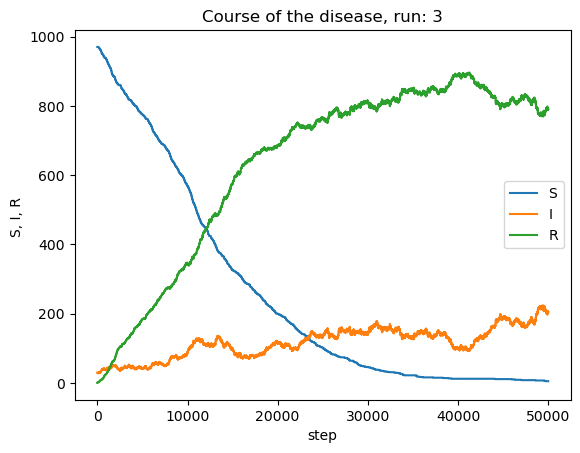

Step: 0
Step: 10000
Step: 20000
Step: 30000
Step: 40000
Done.


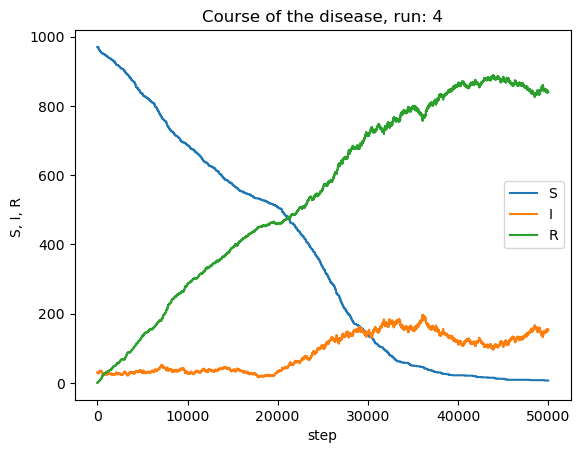

Step: 0
Step: 10000
Step: 20000
Step: 30000
Step: 40000
Done.


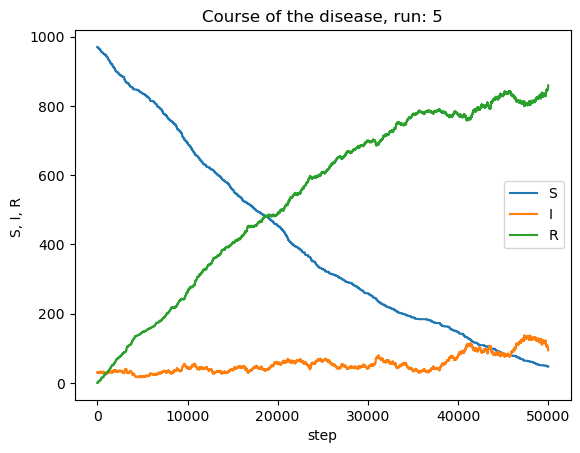

In [ ]:
import matplotlib.pyplot as plt
N_part = 1000  # Total agent population.
d = 0.95  # Diffusion probability.
beta = 0.05  # Infection spreading probability.
gamma = 0.001  # Recovery probability.
L = 200  # Side of the lattice.

alpha = 0.05

I0 = 30  # Initial number of infected agents.

for run in range(5):
    # Initialize agents position.
    x = np.random.randint(L, size=N_part)
    y = np.random.randint(L, size=N_part)

    # Initialize agents status.
    status = np.zeros(N_part)
    status[0:I0] = 1

    step = 0

    S = []  # Keeps track of the susceptible agents.
    I = []  # Keeps track of the infectious agents.
    R = []  # Keeps track of the recovered agents.
    S.append(N_part - I0)
    I.append(I0)
    R.append(0)

    duration = 50000
    running = True
    while step < duration:
        if step % 10000 == 0:
            print("Step:",step)

        x, y, status = diffuse_spread_recover(x, y, status, d, beta, gamma, L, alpha)  
        
        S.append(np.size(np.where(status == 0)[0]))
        I.append(np.size(np.where(status == 1)[0]))
        R.append(np.size(np.where(status == 2)[0]))
        
        step += 1
            
    print('Done.')

    t = np.array(np.arange(len(S)))
    S_agents = np.array(S) 
    I_agents = np.array(I) 
    R_agents = np.array(R) 


    plt.plot(t, S_agents, '-', label='S')
    plt.plot(t, I_agents, '-', label='I')
    plt.plot(t, R_agents, '-', label='R')
    plt.legend()
    plt.title(f'Course of the disease, run: {run+1}')
    plt.xlabel('step')
    plt.ylabel('S, I, R ')
    plt.show()

## Q1

The disease is endemic, we can see that the number of susceptible converges toward 0, however the number of infectious and recovered agents seem to oscillate around a certain value, indicating that the disease will $\textbf{not}$ die out.

## P2

Step: 0
Step: 10000
Done.


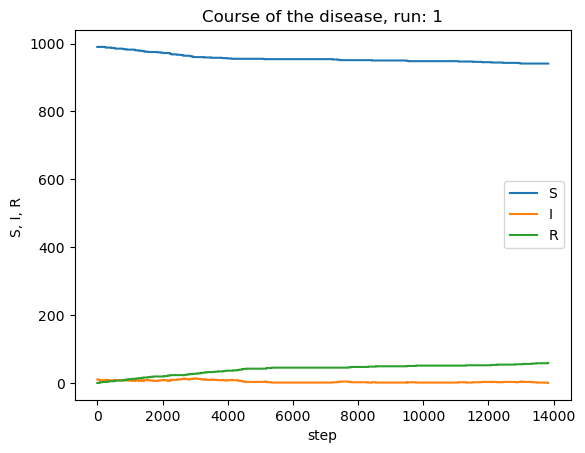

Step: 0
Done.


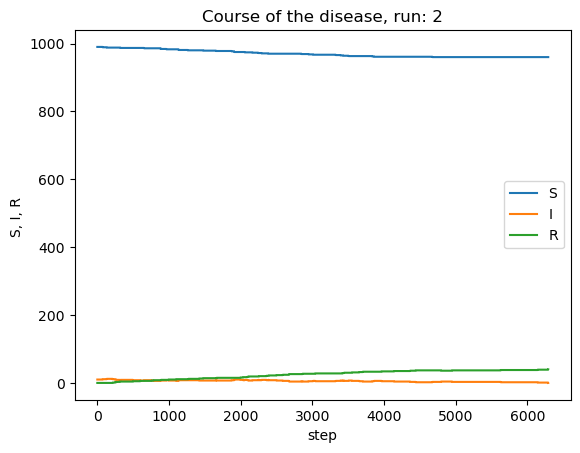

Step: 0
Step: 10000
Done.


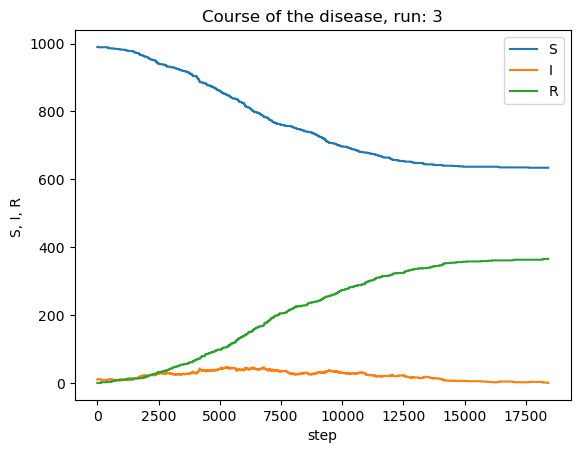

Step: 0
Step: 10000
Step: 20000
Done.


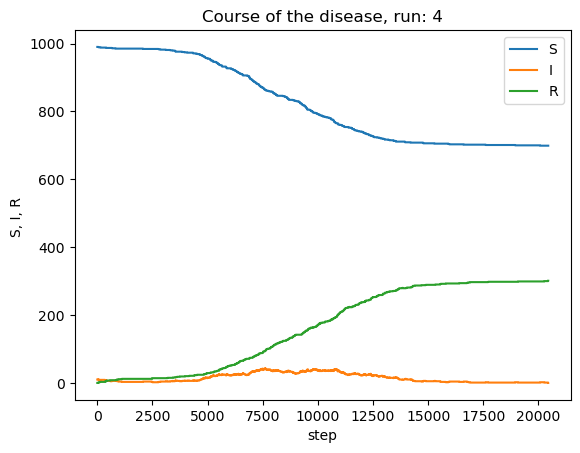

Step: 0
Step: 10000
Done.


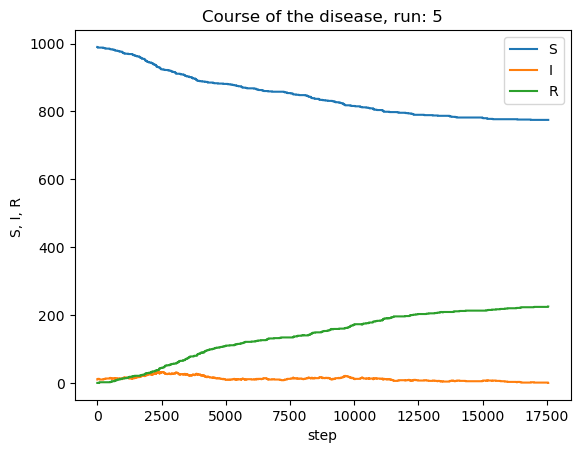

In [ ]:
import matplotlib.pyplot as plt
N_part = 1000  # Total agent population.
d = 0.95  # Diffusion probability.
beta = 0.05  # Infection spreading probability.
gamma = 0.001  # Recovery probability.
L = 200  # Side of the lattice.

alpha = 0.005

I0 = 10  # Initial number of infected agents.

for run in range(5):
    # Initialize agents position.
    x = np.random.randint(L, size=N_part)
    y = np.random.randint(L, size=N_part)

    # Initialize agents status.
    status = np.zeros(N_part)
    status[0:I0] = 1

    step = 0

    S = []  # Keeps track of the susceptible agents.
    I = []  # Keeps track of the infectious agents.
    R = []  # Keeps track of the recovered agents.
    S.append(N_part - I0)
    I.append(I0)
    R.append(0)

    duration = 50000
    while step < duration:
        if step % 10000 == 0:
            print("Step:",step)

        x, y, status = diffuse_spread_recover(x, y, status, d, beta, gamma, L, alpha)  
        
        S.append(np.size(np.where(status == 0)[0]))
        I.append(np.size(np.where(status == 1)[0]))
        R.append(np.size(np.where(status == 2)[0]))
        
        step += 1

            
    print('Done.')

    t = np.array(np.arange(len(S)))
    S_agents = np.array(S) 
    I_agents = np.array(I) 
    R_agents = np.array(R) 


    plt.plot(t, S_agents, '-', label='S')
    plt.plot(t, I_agents, '-', label='I')
    plt.plot(t, R_agents, '-', label='R')
    plt.legend()
    plt.title(f'Course of the disease, run: {run+1}')
    plt.xlabel('step')
    plt.ylabel('S, I, R ')
    plt.show()

## Q2 
